Simulation of a series reaction $A \rightarrow B \rightarrow C$ for a given value of rate constants. 
This example is from James Rawlings [reactor design book](https://sites.engineering.ucsb.edu/~jbraw/chemreacfun/) and the parameter estimation [code](https://github.com/rawlings-group/paresto/blob/master/examples/green_book/ABC.m)

In [1]:
from casadi import *
import numpy as np
import matplotlib.pyplot as plt

In [13]:
cA = MX.sym('cA')
cB = MX.sym('cB')
cC = MX.sym('cC')

In [14]:
x = vertcat(cA, cB, cC)
x

MX(vertcat(cA, cB, cC))

In [15]:
k1 = MX.sym('k1')
k2 = MX.sym('k2')
p = vertcat(k1, k2)
p

MX(vertcat(k1, k2))

In [16]:
# rate equations
r1 = k1 * cA
r2 = k2 * cB
dcA = -r1
dcB = r1 - r2
dcC = r2

In [17]:
ode = vertcat(dcA, dcB, dcC)
ode

MX(@1=(k1*cA), @2=(k2*cB), vertcat((-@1), (@1-@2), @2))

In [18]:
ode = {'x': x, 'p': p, 'ode': ode}

In [19]:
tgrid = np.linspace(0, 5, 100)
F = integrator('F','cvodes',ode,{'tf':5, 'grid': tgrid, 'output_t0' : True})

In [20]:
res = F(x0 = [1.0, 0.0, 0.0], p = [0.5, 3])
res

{'qf': DM([]), 'rqf': DM([]), 'rxf': DM([]), 'rzf': DM([]), 'xf': DM(
 [[1, 0.975064, 0.950749, 0.927041, 0.903924, 0.881383, 0.859405, 0.837974, 0.817078, 0.796703, 0.776837, 0.757465, 0.738577, 0.720159, 0.702201, 0.684691, 0.667617, 0.650969, 0.634736, 0.618908, 0.603475, 0.588427, 0.573753, 0.559446, 0.545496, 0.531893, 0.518629, 0.505697, 0.493086, 0.480791, 0.468802, 0.457111, 0.445713, 0.434598, 0.423761, 0.413194, 0.40289, 0.392844, 0.383048, 0.373496, 0.364182, 0.355101, 0.346246, 0.337612, 0.329193, 0.320984, 0.31298, 0.305175, 0.297565, 0.290145, 0.28291, 0.275855, 0.268976, 0.262269, 0.255729, 0.249352, 0.243134, 0.237071, 0.23116, 0.225395, 0.219775, 0.214295, 0.208951, 0.20374, 0.19866, 0.193706, 0.188876, 0.184166, 0.179573, 0.175095, 0.170729, 0.166472, 0.162321, 0.158273, 0.154326, 0.150478, 0.146726, 0.143067, 0.139499, 0.136021, 0.132629, 0.129321, 0.126097, 0.122952, 0.119886, 0.116897, 0.113982, 0.11114, 0.108368, 0.105666, 0.103031, 0.100462, 0.0979566, 0.095514, 

In [21]:
xsol = res['xf'].full().T

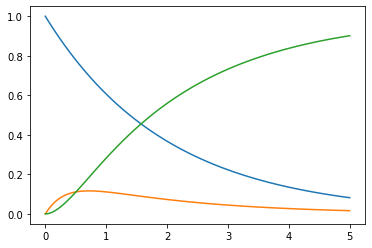

In [22]:
plt.plot(tgrid, xsol)